# Ejemplo filtro Chebyshev pasaaltos

## Plantilla

|  $\alpha$               |  $f$  |
|-------------------------|-------|
|  $\alpha_{max}$ = 3dB   | 45Hz  |
|  $\alpha_{min}$ = 30dB  | 10Hz  |


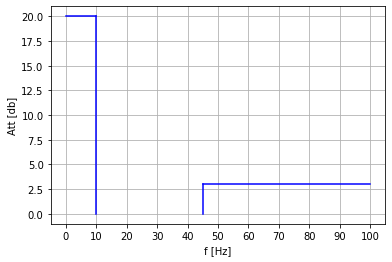

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w_banda_paso = np.linspace(45, 100)
w_banda_att = np.linspace(0, 10)
att_min = 20  # dB
att_max = 3  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att = np.linspace(0, att_min)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db]')
ax.set_xlabel('f [Hz]')
ax.grid(True)
ticks = range(0, 101,10)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-b')
ax.plot(w_banda_att, [att_min] * len(w_banda_att), '-b')
ax.plot([45] * len(vertical_banda_paso), vertical_banda_paso, '-b')
ax.plot([10] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

## Plantilla normalizada

In [7]:
import math as m

w_p = 2 * m.pi * 45
w_s = 2 * m.pi * 10

w_p_n = 1
w_s_n = w_s / w_p

print(f'w_p_n = {w_p_n}, w_s_n = {w_s_n}')

w_p_n = 1, w_s_n = 0.2222222222222222


## Plantilla pasabajos prototipo

In [8]:
w_p_lp = 1 / w_p_n
w_s_lp = 1 / w_s_n

print(f'w_p_lp = {w_p_lp}, w_s_lp = {w_s_lp}')

w_p_lp = 1.0, w_s_lp = 4.5


## Orden del filtro



In [14]:
alpha_max = 3    # dB
alpha_min = 30   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')


epsilon: 0.9976283451109835, N: 2


## Obtención transferencia pasabajos

Formula recurrencia:

| n | $c_n(\omega) = 2 * \omega * c_{n-1}(\omega) - c_{n-2}(\omega)$ |
|:---:|:---:|
| 0 | 1 |
| 1 | $\omega$ |
| 2 | $2*\omega^2 - 1$ |

$\epsilon \simeq 1$

Módulo:

$H(j\omega)*H(-j\omega) = \frac{1}{1 + \epsilon^2 * c^2_2(w)} = \frac{1}{4* \omega^4 - 4 * \omega^2 + 2}$

Factorizamos para obtener $H(s)$:

$H(s)*H(-s) = \frac{1}{4* s^4 + 4 * s^2 + 2} = \frac{1}{a* s^2 + b * s + c}\frac{1}{a* s^2 - b * s + c}$

$c^2 = 2$

$a^2 = 4$

$2*a*c - b^2 = 4$

Resolviendo:

$a = 2$

$b = 2 * \sqrt{\sqrt{2}-1} \simeq 1.287$  

$c = \sqrt{2} \simeq 1.414$

$H(s) = \frac{1}{a* s^2 + b * s + c} \simeq \frac{1}{2* s^2 + 1.287 * s + 1.414}$
